<a href="https://colab.research.google.com/github/sathundorn/Statistical-Learning-Labs1/blob/main/670510773_of_Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:



In [5]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X,y)
ad.feature_importances_

array([0.        , 0.05832968, 0.40003613, 0.54163419])

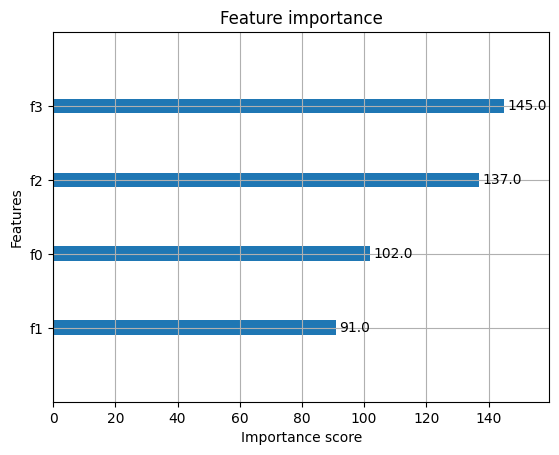

In [1]:
from xgboost import XGBClassifier, plot_importance

from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


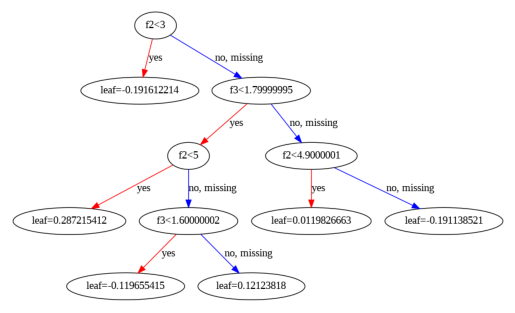

In [4]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [3]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)


X_train



FileNotFoundError: [Errno 2] No such file or directory: 'X_train.csv'

# Task
Download "Lab06-data.zip" from "https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip" and extract "X_train.csv", "y_train.csv", "X_test.csv", and "y_test.csv" to the current working directory.

## Download and Extract Data

### Subtask:
Download the 'Lab06-data.zip' file from 'https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip' and extract 'X_train.csv', 'y_train.csv', 'X_test.csv', and 'y_test.csv' to the current working directory.


**Reasoning**:
The subtask requires downloading a zip file and extracting specific CSV files. I will use `wget` to download the file and then `unzip` to extract the specified CSVs into the current working directory.



In [6]:
import os

# Download the zip file
!wget -q https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip

# Extract the required CSV files from the zip file
# Using -o to overwrite files without prompt if they exist
# Using -d . to extract to the current directory
!unzip -o Lab06-data.zip X_train.csv y_train.csv X_test.csv y_test.csv -d .

# Verify that the files have been extracted
print("Extracted files:")
print(os.listdir('.'))


Archive:  Lab06-data.zip
  inflating: ./X_test.csv            
  inflating: ./X_train.csv           
  inflating: ./y_test.csv            
  inflating: ./y_train.csv           
Extracted files:
['.config', 'X_test.csv', 'y_test.csv', 'y_train.csv', 'Lab06-data.zip', 'X_train.csv', 'sample_data']


In [18]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None).iloc[:, 0]
X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None).iloc[:, 0]

X_train.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,39.0,0.0,2.0,94.0,199.0,0.0,1.0,179.0,0.0,0.0,2.0,0.0,2.0
1,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0
2,50.0,0.0,2.0,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0,2.0
3,54.0,1.0,0.0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0


In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

b_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=b_estimator, random_state=42)


param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_adaboost = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid_adaboost,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)



In [20]:
grid_search_adaboost.fit(X_train, y_train)

print("best paremeters : " , grid_search_adaboost.best_params_)
print("Best out-of-fold accuracy for AdaBoostClassifier:", grid_search_adaboost.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best paremeters :  {'learning_rate': 0.5, 'n_estimators': 50}
Best out-of-fold accuracy for AdaBoostClassifier: 0.8539313399778516


In [21]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

param_grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}


grid_search_xgboost = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgboost,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


In [22]:
grid_search_xgboost.fit(X_train, y_train)

print("Best parameters :", grid_search_xgboost.best_params_)
print("Best out-of-fold accuracy :", grid_search_xgboost.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters : {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Best out-of-fold accuracy : 0.8302325581395349


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:03:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(objective='binary', random_state=42)

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid_lgbm,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("LGBMClassifier and parameter grid defined. GridSearchCV object created.")

In [24]:
grid_search_lgbm.fit(X_train, y_train)

print("Best parameters :", grid_search_lgbm.best_params_)
print("Best out-of-fold accuracy :", grid_search_lgbm.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [26]:
best_adaboost_model = grid_search_adaboost.best_estimator_
best_xgboost_model = grid_search_xgboost.best_estimator_
best_lgbm_model = grid_search_lgbm.best_estimator_

## Plot Feature Importances


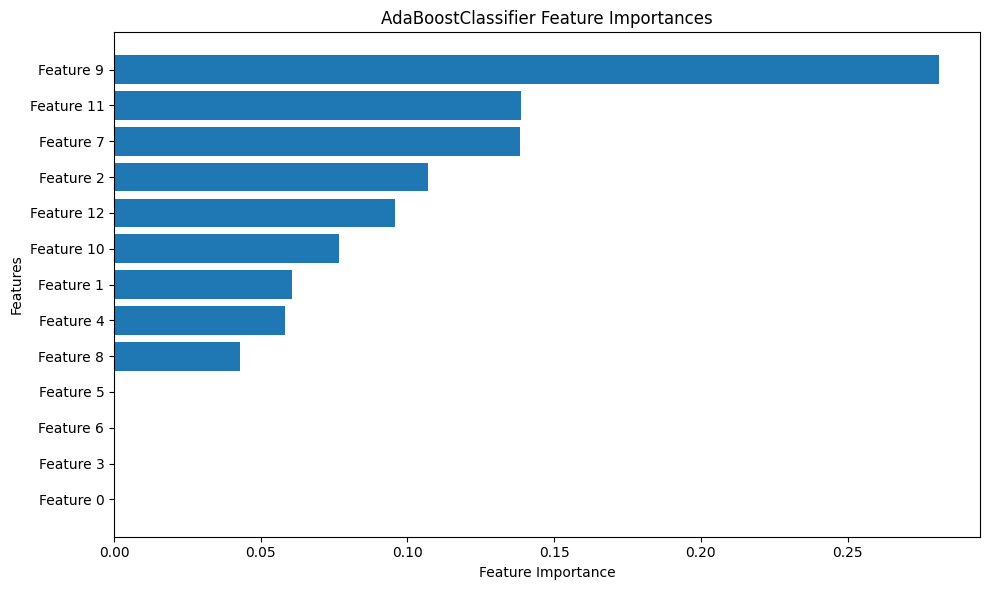

<Figure size 1000x600 with 0 Axes>

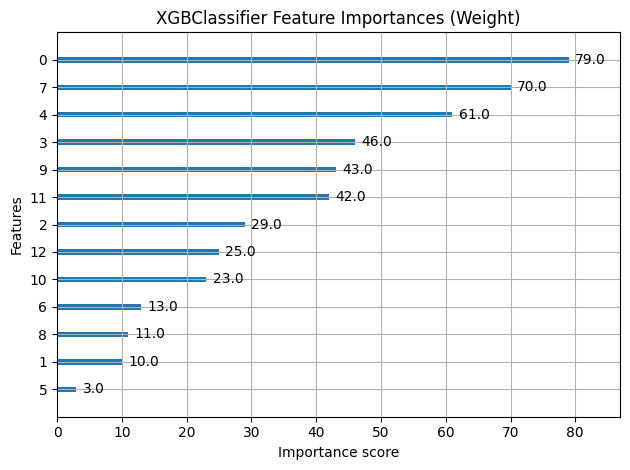

<Figure size 1000x600 with 0 Axes>

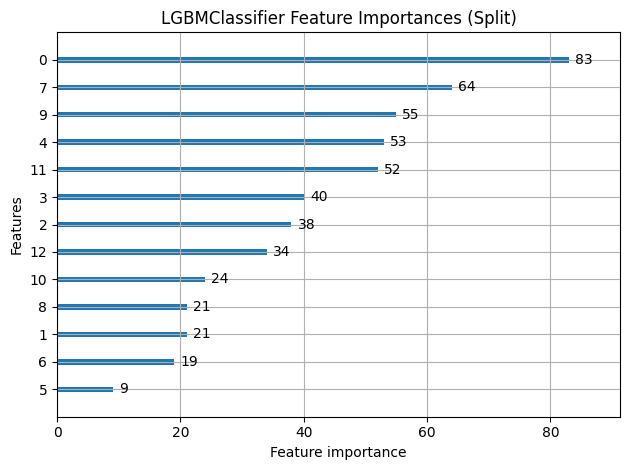

In [27]:
import matplotlib.pyplot as plt
from xgboost import plot_importance as xgb_plot_importance
from lightgbm import plot_importance as lgbm_plot_importance

plt.figure(figsize=(10, 6))
features = [f'Feature {i}' for i in range(X_train.shape[1])]
importances_adaboost = best_adaboost_model.feature_importances_


sorted_idx_adaboost = importances_adaboost.argsort()
plt.barh([features[i] for i in sorted_idx_adaboost], importances_adaboost[sorted_idx_adaboost])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('AdaBoostClassifier Feature Importances')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
xgb_plot_importance(best_xgboost_model, importance_type='weight')
plt.title('XGBClassifier Feature Importances (Weight)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
lgbm_plot_importance(best_lgbm_model, importance_type='split')
plt.title('LGBMClassifier Feature Importances (Split)')
plt.tight_layout()
plt.show()